In [ ]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from datetime import datetime
 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/heart.csv') 

In [ ]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
print('Data Sum of Null Values \n')
print(data.isnull().sum())

Data Sum of Null Values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
#all rows control for null values
print(data.isnull().values.any())

False


In [ ]:
# TODO:- Age Analysis
print(data.age.value_counts()[:10])
#data age show value counts for age least 10

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
Name: age, dtype: int64


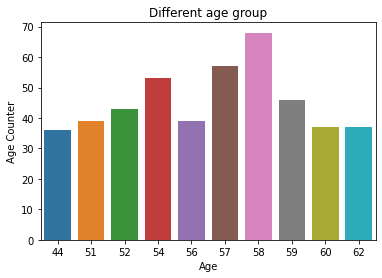

In [ ]:
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Different age group')
plt.show()

In [ ]:
#firstly find min and max ages
minage=min(data.age)
maxage=max(data.age)
meanage=data.age.mean()
print('Min Age :',minage)
print('Max Age :',maxage)
print('Mean Age :',meanage)

Min Age : 29
Max Age : 77
Mean Age : 54.43414634146342


In [ ]:
young_ages=data[(data.age>=29)&(data.age<40)]
middle_ages=data[(data.age>=40)&(data.age<55)]
elderly_ages=data[(data.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 57
Middle Ages : 419
Elderly Ages : 519


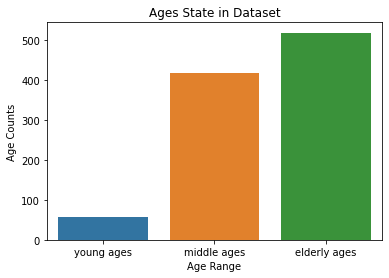

In [ ]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [ ]:
data['ageRange']=0
youngage_index=data[(data.age>=29)&(data.age<40)].index
middleage_index=data[(data.age>=40)&(data.age<55)].index
elderlyage_index=data[(data.age>55)].index

In [ ]:
for index in elderlyage_index:
    data.loc[index,'ageRange']=2
    
for index in middleage_index:
    data.loc[index,'ageRange']=1

for index in youngage_index:
    data.loc[index,'ageRange']=0

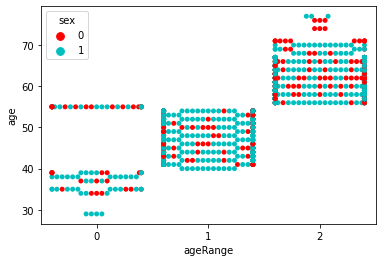

In [ ]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="ageRange", y="age",hue='sex',
              palette=["r", "c", "y"], data=data)
plt.show()

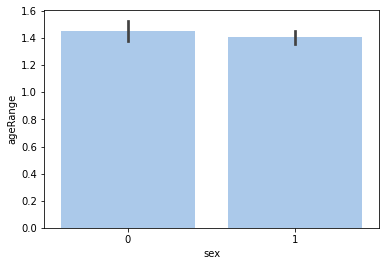

In [ ]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="ageRange", x="sex", data=data,
            label="Total", color="b")
plt.show()

In [ ]:
print(elderly_ages.groupby(elderly_ages['sex'])['thalach'].agg('sum'))

sex
0    25211
1    48730
Name: thalach, dtype: int64


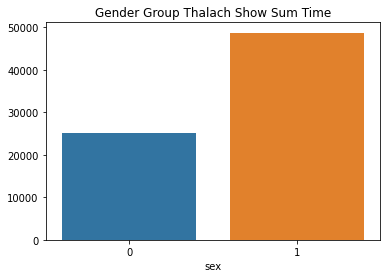

In [ ]:
sns.barplot(x=elderly_ages.groupby(elderly_ages['sex'])['thalach'].agg('sum').index,y=elderly_ages.groupby(elderly_ages['sex'])['thalach'].agg('sum').values)
plt.title("Gender Group Thalach Show Sum Time")
plt.show()

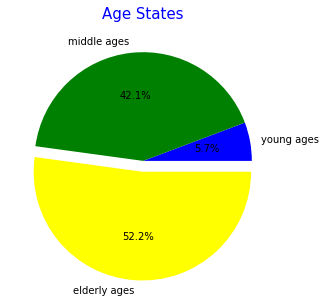

In [ ]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
# TODO :- Sex (Gender) Analysis

print(data.sex.value_counts())

1    713
0    312
Name: sex, dtype: int64


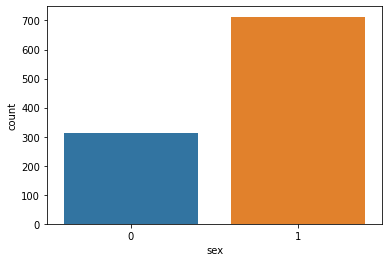

In [ ]:
#Sex (1 = male; 0 = female)
sns.countplot(data.sex)
plt.show()

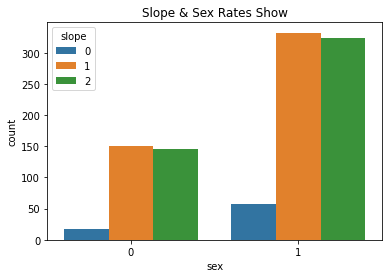

In [ ]:
sns.countplot(data.sex,hue=data.slope)
plt.title('Slope & Sex Rates Show')
plt.show()

In [ ]:
total_genders_count=len(data.sex)
male_count=len(data[data['sex']==1])
female_count=len(data[data['sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 1025
Male Count    : 713
Female Count  : 312


In [ ]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 69.56%
Female State: 30.44%


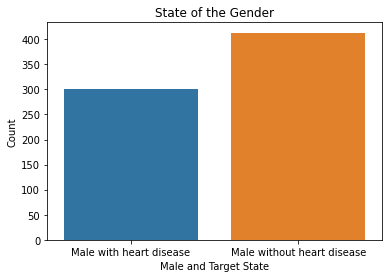

In [ ]:
# Male State & target 1 & 0
male_andtarget_on=len(data[(data.sex==1)&(data['target']==1)])
male_andtarget_off=len(data[(data.sex==1)&(data['target']==0)])
####
sns.barplot(x=['Male with heart disease','Male without heart disease'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

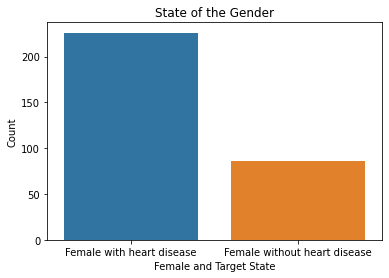

In [ ]:
#Female State & target 1 & 0
female_andtarget_on=len(data[(data.sex==0)&(data['target']==1)])
female_andtarget_off=len(data[(data.sex==0)&(data['target']==0)])
####
sns.barplot(x=['Female with heart disease','Female without heart disease'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

In [ ]:
# TODO:- Chest Pain Type Analysis

print(data.cp.value_counts())

0    497
2    284
1    167
3     77
Name: cp, dtype: int64


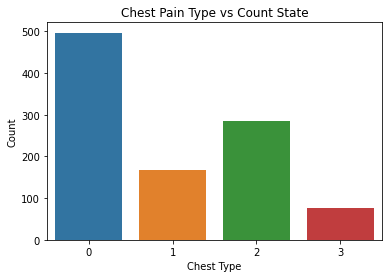

In [ ]:
sns.countplot(data.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Pain Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

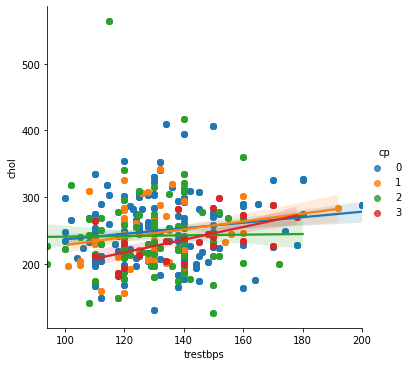

In [ ]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="trestbps", y="chol",data=data,hue="cp")
plt.show()

In [ ]:
data.describe(include =[np.number])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageRange
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171,1.421463
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070,0.643422
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,2.000000


In [ ]:
dt= data.copy()
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,2
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2


In [ ]:
dt=dt.rename(columns={'cp':'chest_pain_type','restecg':'rest_ecg','slope':'st_slope'})

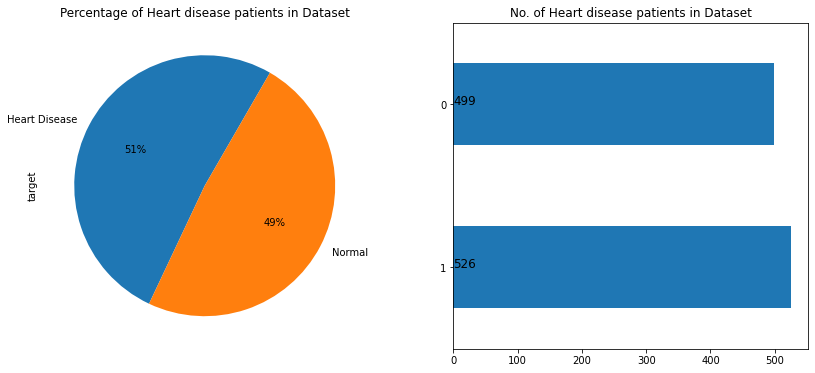

In [ ]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

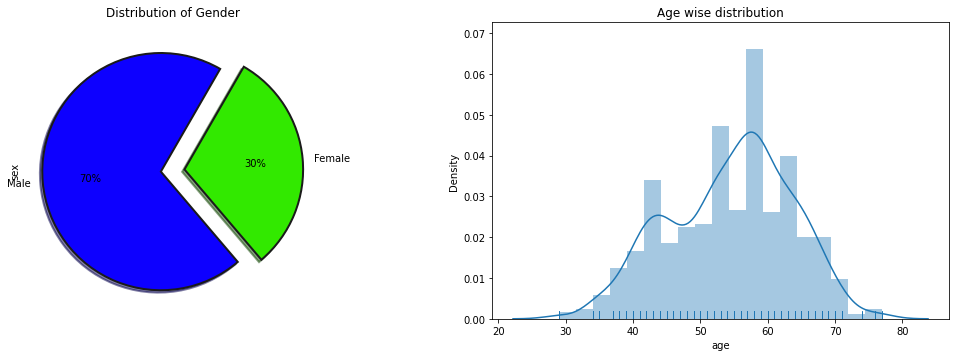

In [ ]:

plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

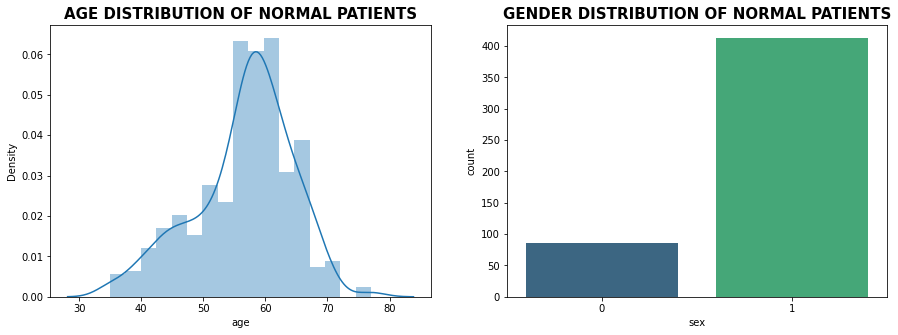

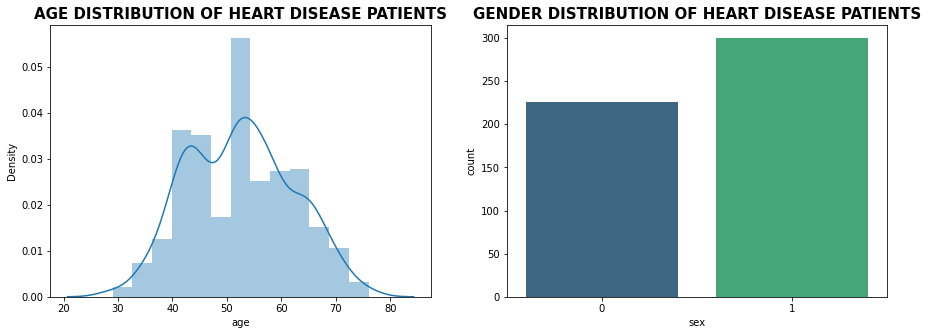

In [ ]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()


In [ ]:
dt.chest_pain_type.unique()

array([0, 1, 2, 3])

In [ ]:
print(dt.chest_pain_type.unique())
print(dt.rest_ecg.unique())
print(dt.st_slope.unique())

[0 1 2 3]
[1 0 2]
[2 0 1]


In [ ]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 0] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 0] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 1] = 'flat'
dt['st_slope'][dt['st_slope'] == 2] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [ ]:
dt.chest_pain_type.unique()

array(['typical angina', 'atypical angina', 'non-anginal pain',
       'asymptomatic'], dtype=object)

In [ ]:
dt.head()

,age,sex,chest_pain_type,trestbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,st_slope,ca,thal,target,ageRange
0,52,male,typical angina,125,212,0,ST-T wave abnormality,168,0,1.0,downsloping,2,3,0,1
1,53,male,typical angina,140,203,1,normal,155,1,3.1,upsloping,0,3,0,1
2,70,male,typical angina,145,174,0,ST-T wave abnormality,125,1,2.6,upsloping,0,3,0,2
3,61,male,typical angina,148,203,0,ST-T wave abnormality,161,0,0.0,downsloping,1,3,0,2
4,62,female,typical angina,138,294,1,ST-T wave abnormality,106,0,1.9,flat,3,2,0,2


In [ ]:
dt['rest_ecg'].value_counts()


ST-T wave abnormality           513
normal                          497
left ventricular hypertrophy     15
Name: rest_ecg, dtype: int64

In [ ]:
dt['chest_pain_type'].value_counts()

typical angina      497
non-anginal pain    284
atypical angina     167
asymptomatic         77
Name: chest_pain_type, dtype: int64

In [ ]:
dt['st_slope'].value_counts()

flat           482
downsloping    469
upsloping       74
Name: st_slope, dtype: int64

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1025 non-null   int64  
 1   sex              1025 non-null   object 
 2   chest_pain_type  1025 non-null   object 
 3   trestbps         1025 non-null   int64  
 4   chol             1025 non-null   int64  
 5   fbs              1025 non-null   int64  
 6   rest_ecg         1025 non-null   object 
 7   thalach          1025 non-null   int64  
 8   exang            1025 non-null   int64  
 9   oldpeak          1025 non-null   float64
 10  st_slope         1025 non-null   object 
 11  ca               1025 non-null   int64  
 12  thal             1025 non-null   int64  
 13  target           1025 non-null   int64  
 14  ageRange         1025 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 120.2+ KB


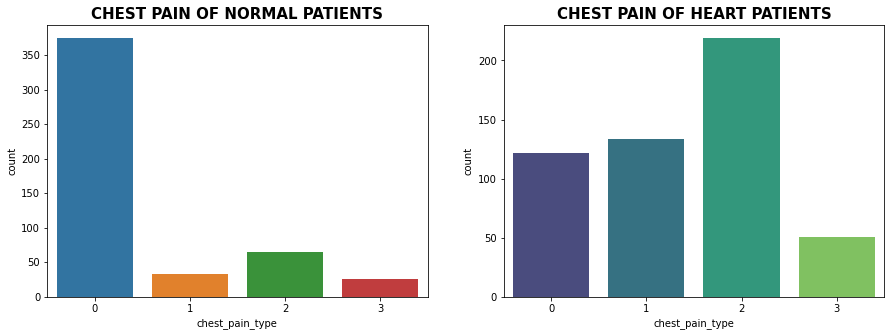

In [ ]:

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:

#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,5.210000,9.700000
atypical angina,6.610000,25.480000
non-anginal pain,13.030000,41.630000
typical angina,75.150000,23.190000


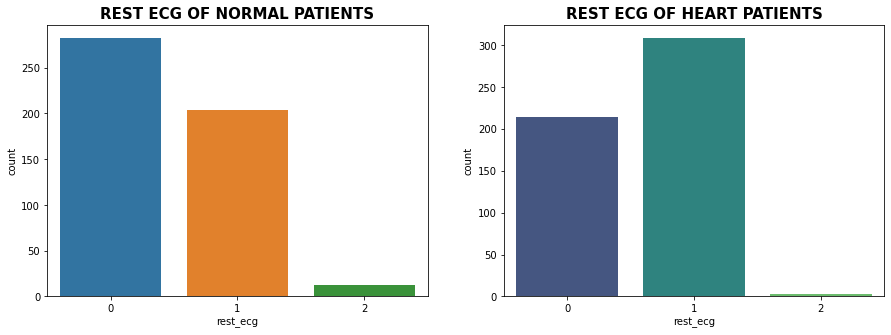

In [ ]:

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,40.880000,58.750000
left ventricular hypertrophy,2.400000,0.570000
normal,56.710000,40.680000


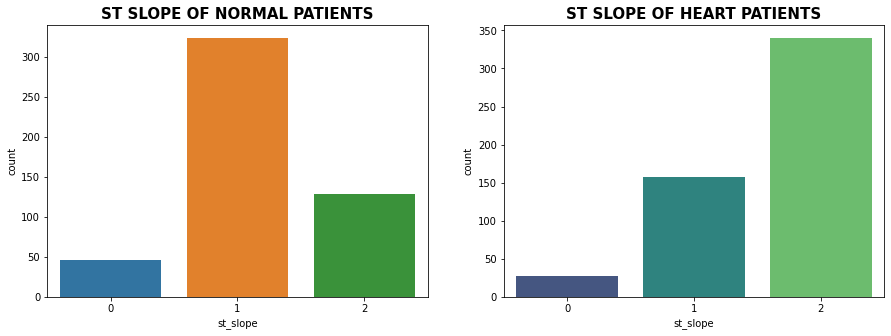

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:

# summary statistics of categorical columns
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1025,1025,1025,1025
unique,2,4,3,3
top,male,typical angina,ST-T wave abnormality,flat
freq,713,497,513,482


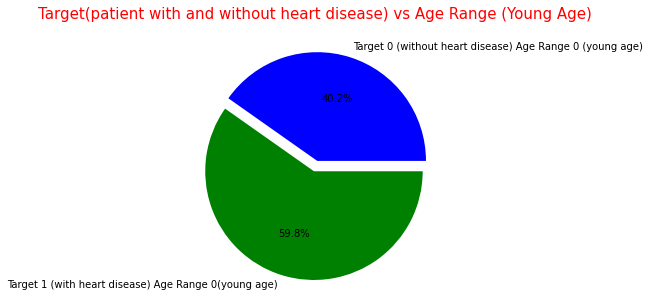

In [ ]:
# TODO:- Age Range Analysis

target_0_agerang_0=len(data[(data.target==0)&(data.ageRange==0)])
target_1_agerang_0=len(data[(data.target==1)&(data.ageRange==0)])

colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 (without heart disease) Age Range 0 (young age)','Target 1 (with heart disease) Age Range 0(young age)'], colors=colors, autopct='%1.1f%%')
plt.title('Target(patient with and without heart disease) vs Age Range (Young Age) ',color = 'red',fontsize = 15)
plt.show()

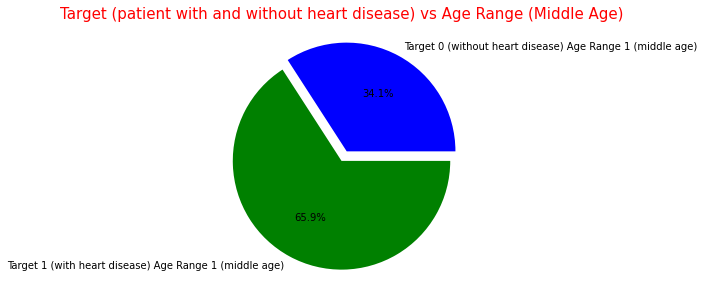

In [ ]:
target_0_agerang_1=len(data[(data.target==0)&(data.ageRange==1)])
target_1_agerang_1=len(data[(data.target==1)&(data.ageRange==1)])
colors = ['blue','green']
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 (without heart disease) Age Range 1 (middle age)','Target 1 (with heart disease) Age Range 1 (middle age)'], colors=colors, autopct='%1.1f%%')
plt.title('Target (patient with and without heart disease) vs Age Range (Middle Age)',color = 'red',fontsize = 15)
plt.show()

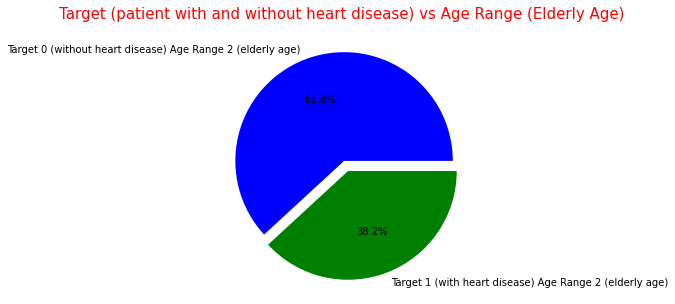

In [ ]:
target_0_agerang_2=len(data[(data.target==0)&(data.ageRange==2)])
target_1_agerang_2=len(data[(data.target==1)&(data.ageRange==2)])
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0 (without heart disease) Age Range 2 (elderly age)','Target 1 (with heart disease) Age Range 2 (elderly age)'], colors=colors, autopct='%1.1f%%')
plt.title('Target (patient with and without heart disease) vs Age Range (Elderly Age) ',color = 'red',fontsize = 15)
plt.show()

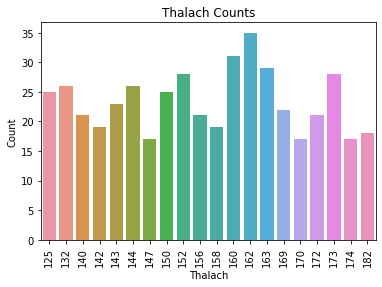

In [ ]:
sns.barplot(x=data.thalach.value_counts()[:20].index,y=data.thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=90)
plt.show()

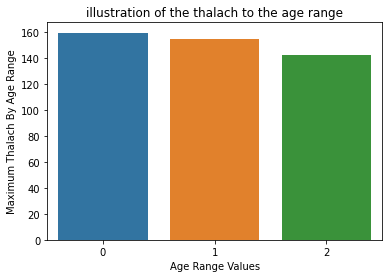

In [ ]:
age_range_thalach=data.groupby('ageRange')['thalach'].mean()
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

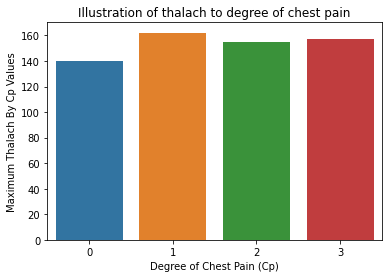

In [ ]:
cp_thalach=data.groupby('cp')['thalach'].mean()
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()
#As seen in this graph, it is seen that the heart rate is less 
#when the chest pain is low. But in cases where chest pain is 
#1, it is observed that the area is more. 2 and 3 were found to 
#be of the same degree.

In [ ]:
# TODO :- Thal Analysis

print(data.thal.value_counts())

2    544
3    410
1     64
0      7
Name: thal, dtype: int64


In [ ]:
#Target 1
a=len(data[(data['target']==1)&(data['thal']==0)])
b=len(data[(data['target']==1)&(data['thal']==1)])
c=len(data[(data['target']==1)&(data['thal']==2)])
d=len(data[(data['target']==1)&(data['thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

#so,Apparently, there is a rate at Thal 2.Now, draw graph
print('*'*50)
#Target 0
e=len(data[(data['target']==0)&(data['thal']==0)])
f=len(data[(data['target']==0)&(data['thal']==1)])
g=len(data[(data['target']==0)&(data['thal']==2)])
h=len(data[(data['target']==0)&(data['thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  3
Target 1 Thal 1:  21
Target 1 Thal 2:  412
Target 1 Thal 3:  90
**************************************************
Target 0 Thal 0:  4
Target 0 Thal 1:  43
Target 0 Thal 2:  132
Target 0 Thal 3:  320


In [ ]:
# TODO :- Target Analysis

print(data.target.unique())
#only two values are shown.
#A value of 1 is the value of patient 0

[0 1]


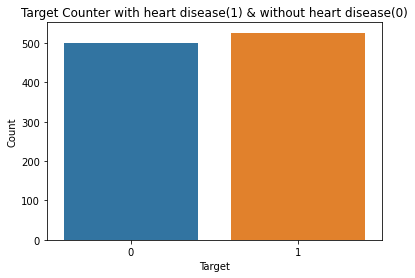

In [ ]:
sns.countplot(data.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter with heart disease(1) & without heart disease(0)')
plt.show()

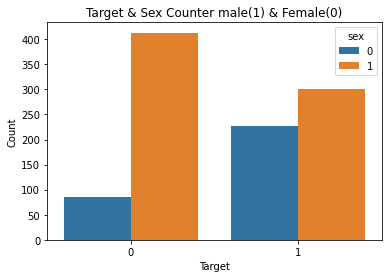

In [ ]:
sns.countplot(data.target,hue=data.sex)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Sex Counter male(1) & Female(0)')
plt.show()

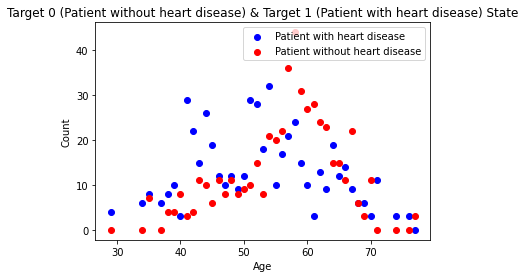

In [ ]:
#determine the age ranges of patients with and without sickness and make analyzes about them
age_counter_target_1=[]
age_counter_target_0=[]
for age in data.age.unique():
    age_counter_target_1.append(len(data[(data['age']==age)&(data.target==1)]))
    age_counter_target_0.append(len(data[(data['age']==age)&(data.target==0)]))

#now, draw show on graph    
#Target 1 & 0 show graph on scatter
plt.scatter(x=data.age.unique(),y=age_counter_target_1,color='blue',label='Patient with heart disease')
plt.scatter(x=data.age.unique(),y=age_counter_target_0,color='red',label='Patient without heart disease')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target 0 (Patient without heart disease) & Target 1 (Patient with heart disease) State')
plt.show()

In [ ]:
df=data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,2
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2


In [ ]:
from keras.utils import to_categorical
# one hot encode
encoded1 = pd.DataFrame(to_categorical(df.restecg),columns=['restecg0','restecg1','restecg2'])
encoded2 = pd.DataFrame(to_categorical(df.cp),columns=['cp0','cp1','cp2','cp3'])
encoded3 = pd.DataFrame(to_categorical(df.thal),columns=['thal0','thal1','thal2','thal3'])
encoded4 = pd.DataFrame(to_categorical(df.ca),columns=['ca0','ca1','ca2','ca3','ca4'])
encoded5 = pd.DataFrame(to_categorical(df.slope),columns=['slope0','slope1','slope2'])

df = pd.concat([df,encoded1,encoded2,encoded3,encoded4,encoded5],axis=1).drop(['restecg','cp','thal','ca','slope'],axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,ageRange,restecg0,restecg1,restecg2,cp0,cp1,cp2,cp3,thal0,thal1,thal2,thal3,ca0,ca1,ca2,ca3,ca4,slope0,slope1,slope2
0,52,1,125,212,0,168,0,1.0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,53,1,140,203,1,155,1,3.1,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,70,1,145,174,0,125,1,2.6,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,61,1,148,203,0,161,0,0.0,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62,0,138,294,1,106,0,1.9,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(
    df.drop(['target'], axis=1),
    df[['target']],
    test_size=0.3,
    random_state=41)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(717, 28)
(308, 28)


In [ ]:
for column in X_train.columns:
    
    df_train1 = X_train[(y_train.target==0) & (X_train[column]<np.mean(X_train.loc[y_train.target==0,column])+3*np.std(X_train.loc[y_train.target==0,column]))]
    df_test1 = X_test[(y_test.target==0) & (X_test[column]<np.mean(X_train.loc[y_train.target==0,column])+3*np.std(X_train.loc[y_train.target==0,column]))]
    
    label_train1 = y_train[(y_train.target==0) & (X_train[column]<np.mean(X_train.loc[y_train.target==0,column])+3*np.std(X_train.loc[y_train.target==0,column]))]
    label_test1 = y_test[(y_test.target==0) & (X_test[column]<np.mean(X_train.loc[y_train.target==0,column])+3*np.std(X_train.loc[y_train.target==0,column]))]
    
    df_train2 = X_train[(y_train.target==1) & (X_train[column]<np.mean(X_train.loc[y_train.target==1,column])+3*np.std(X_train.loc[y_train.target==1,column]))]
    df_test2 = X_test[(y_test.target==1) & (X_test[column]<np.mean(X_train.loc[y_train.target==1,column])+3*np.std(X_train.loc[y_train.target==1,column]))]
    
    label_train2 = y_train[(y_train.target==1) & (X_train[column]<np.mean(X_train.loc[y_train.target==1,column])+3*np.std(X_train.loc[y_train.target==1,column]))]
    label_test2 = y_test[(y_test.target==1) & (X_test[column]<np.mean(X_train.loc[y_train.target==1,column])+3*np.std(X_train.loc[y_train.target==1,column]))]

In [ ]:
X_train=pd.concat([df_train1,df_train2])
y_train=pd.concat([label_train1,label_train2])

X_test=pd.concat([df_test1,df_test2])
y_test=pd.concat([label_test1,label_test2])

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
constant_filter = VarianceThreshold(threshold=0.0)
constant_filter.fit(X_train)
X_train = constant_filter.transform(X_train)
X_test = constant_filter.transform(X_test)

X_train.shape, X_test.shape

((717, 28), (308, 28))

In [ ]:
columns=df.columns
columns_new=[]
for i in columns:
    columns_new.append(any(df[i].isnull()|df[i].isnull()))
df=df.drop(columns[columns_new],axis=1)

In [ ]:
mm_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(mm_scaler.fit_transform(X_train))
X_test=pd.DataFrame(mm_scaler.transform(X_test))

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=50)
logreg.fit(X_train, y_train.values.ravel())
y_pred_logreg=logreg.predict(X_test)
acc = metrics.accuracy_score(y_pred_logreg,y_test.values.ravel())*100

print("Test Accuracy of Logistic Regression Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistic Regression Algorithm: 84.42%


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())

y_pred_nb=nb.predict(X_test)
acc = metrics.accuracy_score(y_pred_nb,y_test.values.ravel())*100

print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.77%


In [ ]:
from sklearn.svm import SVC
from sklearn import svm

svm = svm.SVC(random_state = 1,probability=True)
svm.fit(X_train, y_train.values.ravel())

y_pred_svm=svm.predict(X_test)
acc = metrics.accuracy_score(y_pred_svm,y_test.values.ravel())*100

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 93.83%


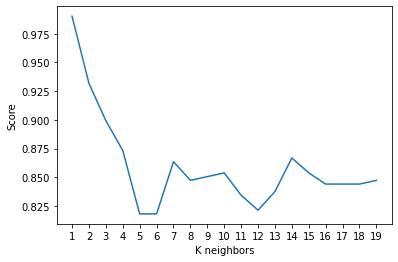

Maximum KNN Score is 99.03%


In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# try ro find best k value
score = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train, y_train.values.ravel())
    score.append(knn.score(X_test, y_test.values.ravel()))
    
plt.plot(range(1,20), score)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K neighbors")
plt.ylabel("Score")
plt.show()

acc = max(score)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors means k
knn.fit(X_train, y_train.values.ravel()) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn=knn.predict(X_test)
acc = metrics.accuracy_score(y_pred_knn,y_test.values.ravel())*100
print("KNN Accuracy Score : {:.2f}%".format(acc))

KNN Accuracy Score : 86.36%


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced",n_estimators=200,random_state = 1)
rf.fit(X_train, y_train.values.ravel())
y_pred_rf=rf.predict(X_test)
acc = metrics.accuracy_score(y_pred_rf,y_test.values.ravel())*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.03%


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=40, batch_size=32)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)

Epoch 1/40
23/23 [==============================] - 1s 1ms/step - loss: 0.8151 - accuracy: 0.5361
Epoch 2/40
23/23 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5862
Epoch 3/40
23/23 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6755
Epoch 4/40
23/23 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7367
Epoch 5/40
23/23 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7294
Epoch 6/40
23/23 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7233
Epoch 7/40
23/23 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.7721
Epoch 8/40
23/23 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.8239
Epoch 9/40
23/23 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7965
Epoch 10/40
23/23 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8156
Epoch 11/40
23/23 [

In [ ]:
#Evaluating models
def conf_matrix(matrix,pred):
    class_names= [0,1]# name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

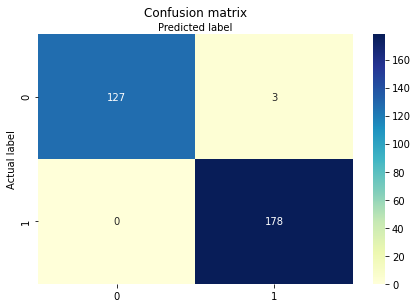

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.98      1.00      0.99       178

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [ ]:
#Random Forest
# make class predictions with the model
y_pred = rf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

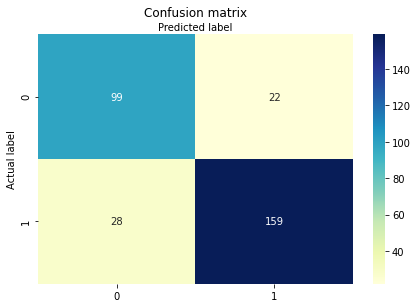

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       121
           1       0.88      0.85      0.86       187

    accuracy                           0.84       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.84      0.84      0.84       308



In [ ]:

#Naive bayes
# make class predictions with the model
y_pred = nb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

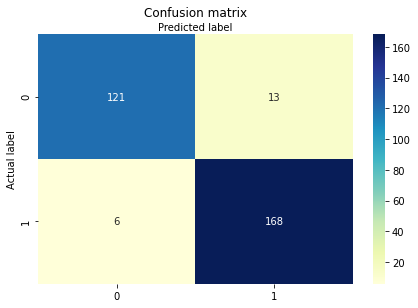

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       134
           1       0.93      0.97      0.95       174

    accuracy                           0.94       308
   macro avg       0.94      0.93      0.94       308
weighted avg       0.94      0.94      0.94       308



In [ ]:
#svm
# make class predictions with the model
y_pred = svm.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

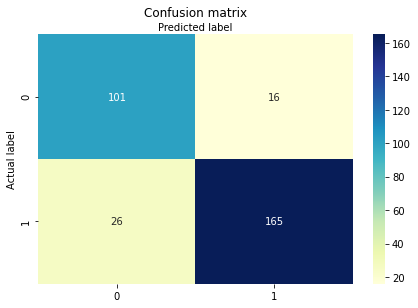

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       117
           1       0.91      0.86      0.89       191

    accuracy                           0.86       308
   macro avg       0.85      0.86      0.86       308
weighted avg       0.87      0.86      0.86       308



In [ ]:
#K-Neighbours
# make class predictions with the model
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

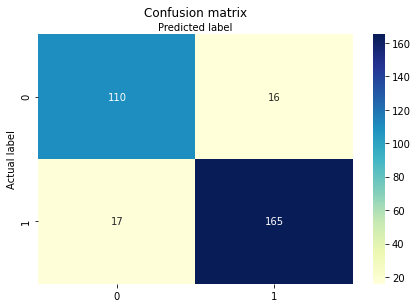

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       126
           1       0.91      0.91      0.91       182

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



In [ ]:
#Neural network
# make class predictions with the model
y_pred = model.predict_classes(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
report = classification_report(y_pred,y_test)
print(report)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Logistic Regression,0.844156,0.875706,0.856354,0.826772,0.865922,0.841563


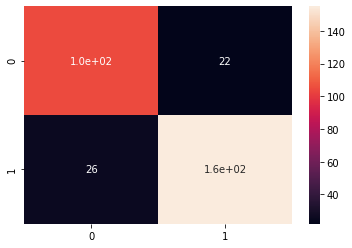

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.metrics import f1_score
CM=confusion_matrix(y_test,y_pred_logreg)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_logreg)
roc=roc_auc_score(y_test, y_pred_logreg)
prec = precision_score(y_test, y_pred_logreg)
rec = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)


model_results =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

model_results

In [ ]:
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
data = {        'logreg': y_pred_logreg,
                'nb': y_pred_nb,
                'svm': y_pred_svm,
                'knn': y_pred_knn,
                'rf': y_pred_rf, 
                
            }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
  
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Logistic Regression,0.844156,0.875706,0.856354,0.826772,0.865922,0.841563
1,logreg,0.844156,0.875706,0.856354,0.826772,0.865922,0.841563
2,nb,0.837662,0.850267,0.878453,0.779528,0.864130,0.828990
3,svm,0.938312,0.965517,0.928177,0.952756,0.946479,0.940466
4,knn,0.863636,0.863874,0.911602,0.795276,0.887097,0.853439
5,rf,0.990260,1.000000,0.983425,1.000000,0.991643,0.991713


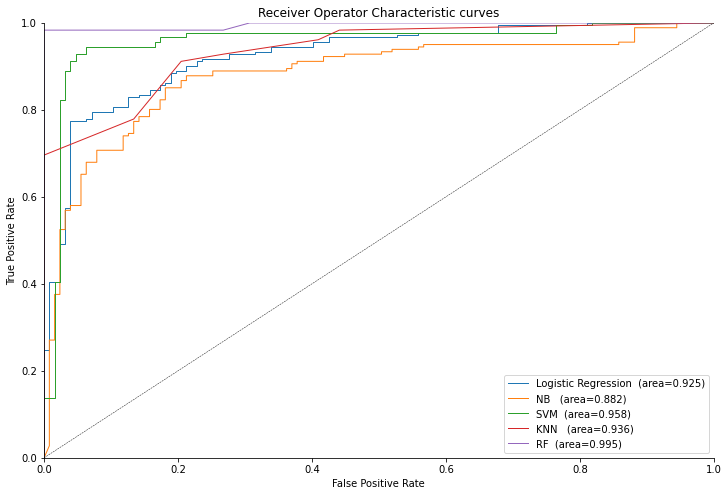

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,logreg.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,nb.predict_proba(X_test),label='NB  ',l='-')
roc_auc_plot(y_test,svm.predict_proba(X_test),label='SVM ',l='-')
roc_auc_plot(y_test,knn.predict_proba(X_test),label='KNN  ',l='-')
roc_auc_plot(y_test,rf.predict_proba(X_test),label='RF ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

In [ ]:
# TODO:- MODEL, TRAINING and TESTING
import pandas as pd 
data = pd.read_csv("/content/heart.csv") 
print(data.corr())
data.corr()

               age       sex        cp  ...        ca      thal    target
age       1.000000 -0.103240 -0.071966  ...  0.271551  0.072297 -0.229324
sex      -0.103240  1.000000 -0.041119  ...  0.111729  0.198424 -0.279501
cp       -0.071966 -0.041119  1.000000  ... -0.176206 -0.163341  0.434854
trestbps  0.271121 -0.078974  0.038177  ...  0.104554  0.059276 -0.138772
chol      0.219823 -0.198258 -0.081641  ...  0.074259  0.100244 -0.099966
fbs       0.121243  0.027200  0.079294  ...  0.137156 -0.042177 -0.041164
restecg  -0.132696 -0.055117  0.043581  ... -0.078072 -0.020504  0.134468
thalach  -0.390227 -0.049365  0.306839  ... -0.207888 -0.098068  0.422895
exang     0.088163  0.139157 -0.401513  ...  0.107849  0.197201 -0.438029
oldpeak   0.208137  0.084687 -0.174733  ...  0.221816  0.202672 -0.438441
slope    -0.169105 -0.026666  0.131633  ... -0.073440 -0.094090  0.345512
ca        0.271551  0.111729 -0.176206  ...  1.000000  0.149014 -0.382085
thal      0.072297  0.198424 -0.163341

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [ ]:
#New show columns
print(data.columns)

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')


In [ ]:
dataX=data.drop('Target',axis=1)
dataY=data['Target']
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.3,random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (717, 13)
X_test (308, 13)
y_train (717,)
y_test (308,)


In [ ]:
#Normalization as the first process
# Normalize
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[0.26088396 0.17821895 0.12736953 0.0915226  0.08959085 0.06144918
 0.05460758 0.03362408 0.03119269 0.0224518  0.02045211 0.01599342
 0.01264325]

['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal']
[[ 5.07366448e-02  3.81922173e-01 -3.57627938e-01  1.61082502e-02
   1.65882196e-02  3.56780070e-02 -8.64144800e-02 -1.50426292e-01
   7.75637664e-01  1.43164577e-01 -1.99066593e-01  1.24246531e-01
   1.20771758e-01]
 [ 8.19333447e-02 -9.10242976e-01 -1.79967078e-01  5.08280197e-02
   9.06794693e-02  5.06201217e-02 -1.70120762e-02 -7.00916167e-02
   3.12601562e-01  3.66290367e-02 -1.12255439e-01 -1.43985920e-02
  -4.37673473e-02]
 [ 1.47999355e-01  2.99760276e-02  1.87605048e-01  1.29205005e-01
   3.69370785e-02  9.08510659e-01 -1.42970802e-01 -2.90747663e-02
  -8.40462917e-02  5.17287851e-02 -1.40048622e-01  2.18741352e-01
  -8.06483043e-03]
 [ 1.78153239e-01  6.68203512e-03 -3.67984393e-01  5.46430794e-02
   8.69439126e-03 -2.0

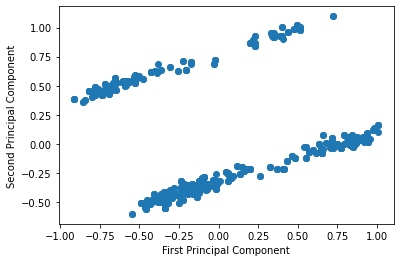

In [ ]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

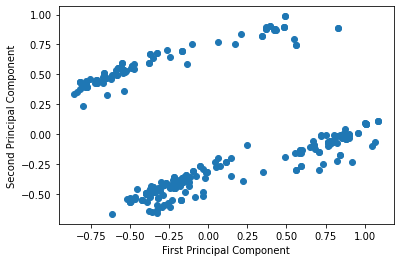

In [ ]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test


def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

In [ ]:
# TODO :------Logistic Regression

parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 


('Dim1', 'Dim2', 'Dim3')
**************************************************
Best parameters set:
{'C': 0.1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       340
           1       0.73      0.84      0.78       377

    accuracy                           0.75       717
   macro avg       0.76      0.75      0.75       717
weighted avg       0.76      0.75      0.75       717

**************************************************
Train Confusion Matrix:
[[220 120]
 [ 59 318]]
**************************************************
Test Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.86      0.63      0.73       159
           1       0.69      0.89      0.78       149

    accuracy                           0.76       308
  

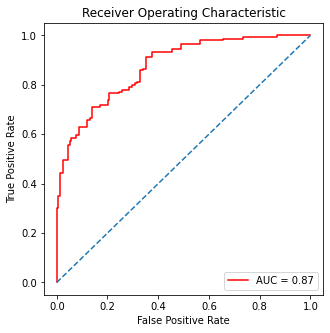

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

In [ ]:
from sklearn.metrics import r2_score,accuracy_score

print('Error rate :',r2_score(y_test,y_pred))
print('Accurancy rate :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

Error rate : -0.0010552530496814594
Accurancy rate : 0.75
Logistic TRAIN score with  0.8465829846582985
Logistic TEST score with  0.75



[[114  45]
 [ 32 117]]


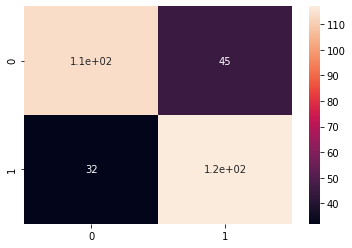

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
# TODO:- K-Nearest Neighbors


parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 2}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       340
           1       1.00      0.99      0.99       377

    accuracy                           0.99       717
   macro avg       0.99      0.99      0.99       717
weighted avg       0.99      0.99      0.99       717

**************************************************
Train Confusion Matrix:
[[340   0]
 [  4 373]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       159
           1       0.77      0.89      0.82      

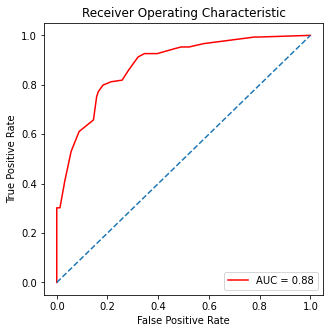

Accurancy rate : 0.7792207792207793
KNN TRAIN score with  0.8535564853556485
KNN TEST score with  0.7792207792207793



In [ ]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy rate :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

[[118  41]
 [ 27 122]]


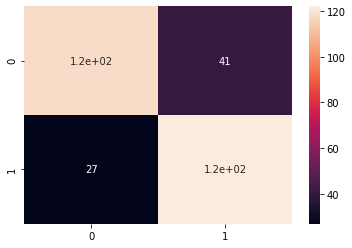

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

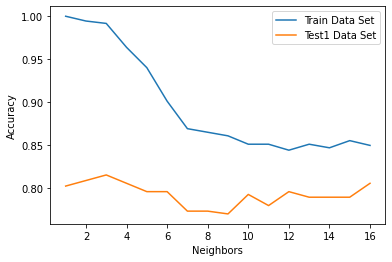

In [ ]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [ ]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.9818032015065912, 0.9455037664783426, 0.9092278719397364, 0.871539548022599, 0.8422787193973634, 0.8338983050847456, 0.833921845574388, 0.8325564971751412, 0.8381120527306968, 0.8297316384180791, 0.8367231638418079, 0.8408898305084747, 0.8338983050847458, 0.8269067796610171, 0.8310263653483992, 0.8338747645951036]


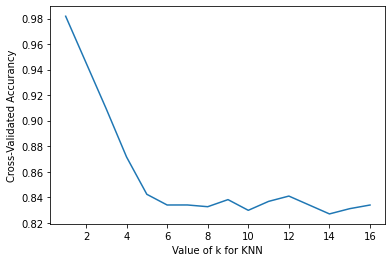

In [ ]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [ ]:
print('Leaf Size :',knn.leaf_size)
print('Metric :',knn.metric_params)
print('Radius :',knn.radius)
print('Weights :',knn.weights)
print('Algorithms :',knn.algorithm)

Leaf Size : 30
Metric : None
Radius : None
Weights : uniform
Algorithms : auto


In [ ]:
# DOTO :0 Naive Baes
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)


**************************************************
Best parameters set:
{'C': 6, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       340
           1       0.82      0.79      0.81       377

    accuracy                           0.80       717
   macro avg       0.80      0.80      0.80       717
weighted avg       0.80      0.80      0.80       717

**************************************************
Train Confusion Matrix:
[[276  64]
 [ 78 299]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       159
           1       0.77      0.82      

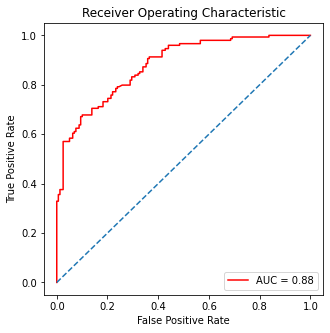

In [ ]:
from sklearn import svm
 
svc=svm.SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)
 
y_pred=svc.predict(X_test)
 
y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

In [ ]:
from sklearn.metrics import r2_score,accuracy_score

print('Accurancy rate :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

Accurancy rate : 0.7597402597402597
SVC TRAIN score with  0.8577405857740585
SVC TEST score with  0.7597402597402597



[[112  47]
 [ 27 122]]


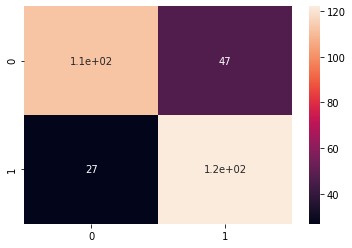

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
# Random Forest
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 17, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       377

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

**************************************************
Train Confusion Matrix:
[[340   0]
 [  0 377]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       159
           1       0.72      0.87      0.79       14

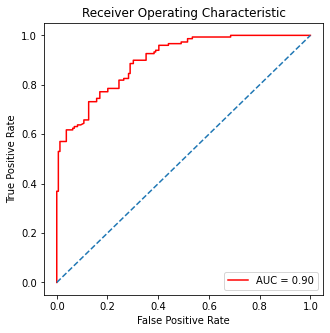

In [ ]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

In [ ]:
from sklearn.metrics import r2_score,accuracy_score
print('Accurancy rate :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

Accurancy rate : 0.7922077922077922
RandomForestClassifier TRAIN score with  0.9888423988842399
RandomForestClassifier TEST score with  0.7922077922077922



[[111  48]
 [ 16 133]]


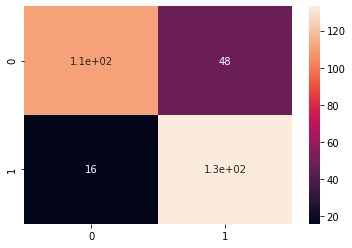

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
for i in range(1,10):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

TEST set score w/ 1 estimators: 0.68831
TEST set score w/ 2 estimators: 0.72403
TEST set score w/ 3 estimators: 0.78571
TEST set score w/ 4 estimators: 0.76623
TEST set score w/ 5 estimators: 0.78571
TEST set score w/ 6 estimators: 0.78247
TEST set score w/ 7 estimators: 0.77273
TEST set score w/ 8 estimators: 0.75325
TEST set score w/ 9 estimators: 0.77597


In [ ]:
# TODO:- SVM

parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)


**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       340
           1       0.81      0.80      0.81       377

    accuracy                           0.80       717
   macro avg       0.80      0.80      0.80       717
weighted avg       0.80      0.80      0.80       717

**************************************************
Train Confusion Matrix:
[[269  71]
 [ 75 302]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       159
           1       0.78      0.86      0.82       149

    accuracy                           0.81       308
  

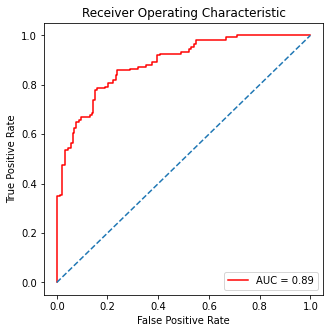

In [ ]:
from sklearn import svm

SV=svm.SVC(random_state = 1,probability=True)
SV.fit(X_train,y_train)

y_pred=SV.predict(X_test)

y_proba=SV.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(32), learning_rate_init=0.001, max_iter=150)
model = MLP.fit(X_train, y_train)
MLP_predict = MLP.predict(X_test)
MLP_conf_matrix = confusion_matrix(y_test, MLP_predict)
MLP_acc_score = accuracy_score(y_test, MLP_predict)


#Printing the confussion matrix and accuracy scoresprint("confussion matrix")
print(MLP_conf_matrix)
print("\n")
print(classification_report(y_test,MLP_predict))
print("Accuracy of Multilayer Perceptron classifier: {:.3f}".format(MLP_acc_score*100),'%\n')

[[116  43]
 [ 29 120]]


              precision    recall  f1-score   support

           0       0.80      0.73      0.76       159
           1       0.74      0.81      0.77       149

    accuracy                           0.77       308
   macro avg       0.77      0.77      0.77       308
weighted avg       0.77      0.77      0.77       308

Accuracy of Multilayer Perceptron classifier: 76.623 %

